In [39]:
import pandas as pd
from sklearn.datasets import load_wine
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [19]:
df = pd.read_csv("winequality-red.csv", sep = ";")

In [21]:
def quality_mapping(x):
    if x == 3:
        return 0
    elif x == 4:
        return 1
    elif x == 5:
        return 2
    elif x == 6:
        return 3
    elif x == 7:
        return 4
    else:
        return 5
    
df.loc[:, "quality"] = df.loc[:, "quality"].apply(lambda x: quality_mapping(x))

In [28]:
import torch
# 데이터 셔플
idx = torch.randperm(len(df)).numpy()
df = df.iloc[idx, :].reset_index(drop = True)

In [38]:
df_train = df.head(1000)
df_test = df.tail(599)

In [40]:
clf = DecisionTreeClassifier(max_depth = 3)

In [43]:
clf.fit(df_train.iloc[:, :-1], df_train.iloc[:, -1])

DecisionTreeClassifier(max_depth=3)

In [47]:
train_pred = clf.predict(df_train.iloc[:, :-1])

test_pred = clf.predict(df_test.iloc[:, :-1])

train_acc = accuracy_score(df_train.iloc[:, -1], train_pred)
test_acc = accuracy_score(df_test.iloc[:, -1], test_pred)

In [48]:
df.columns[:-1]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc("xtick", labelsize = 20)
plt.rc("ytick", labelsize = 20)

%matplotlib inline

train_acc_lst = []
test_acc_lst = []

for depth in range(1, 25):
    clf = DecisionTreeClassifier(max_depth=depth)
    x = df.columns[:-1]
    y = df.columns[-1]
    
    clf.fit(df_train[x], df_train[y])
    
    train_pred = clf.predict(df_train[x])
    test_pred = clf.predict(df_test[x])
    
    train_acc = accuracy_score(df_train[y], train_pred)
    test_acc = accuracy_score(df_test[y], test_pred)
    
    train_acc_lst.append(train_acc)
    test_acc_lst.append(test_acc)

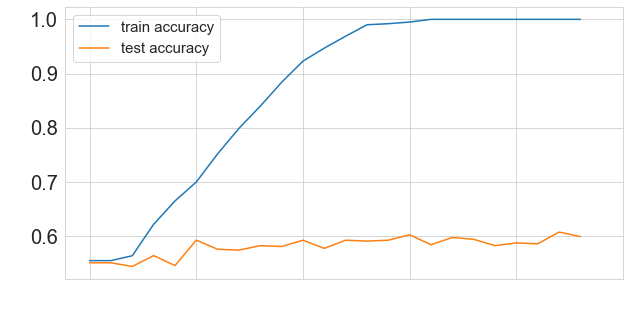

In [66]:
plt.figure(figsize = (10, 5))
sns.set_style("whitegrid")
plt.plot(train_acc_lst, label = "train accuracy")
plt.plot(test_acc_lst, label = "test accuracy")
plt.legend(loc = "upper left", prop = {"size":15})
plt.xticks(range(0, 26, 5), c = "white")
plt.xlabel("max_depth", size = 20, c= "white")
plt.ylabel("accuracy", size = 20, c= "white")
plt.show()

## 교차검증 : 학습에 사용되지 않은 실제 데이터에서 좋은 성능ㄹ 낼 수 있는 머신러닝 모델을 만들기 위해 가장 주요한 단계
- 오버피팅(Over Fitting) : 학습 데이터는 환벽하게 학습하지만, 학습에 사용도지 않은 데이터에서의 성능이 좋지 않은 경우

- 딥러닝의 오버피팅 : 학습손실은 향상 되는데 시험손실은 악화 되는 경우

-  홀드 아웃(hold-out) : 데이터를 train과 test셋으로 나누는 교차검증 방법
    - 데이터 사이즈가 크고 모델 학습이 오래 걸리는 경우 사용하는 검증방식